<a href="https://colab.research.google.com/github/Prajaktahz/ML-Practice-Uni/blob/main/Week_5_Python_%26_NetworkX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://www.nlab.org.uk/wp-content/uploads/nlabmain.png" style="width:40%; clear:both; margin-bottom:-20px" align=left>
<br style="clear:both;"/>

## Analytics Specializations & Applications - Week 5

# Network Analytics - Example with Python and NetworkX
----------
Dr Georiana Nica-Avram - University of Nottingham
[mail](mailto:georgiana.nica-avram1@nottingham.ac.uk)
[web](http://www.neodemographics.org)

# Dowloading our edge list

In [1]:
# This next line is only to be used on Google Colaboratory and will download the CSV file for you

!wget -O email_edges.csv "https://drive.google.com/uc?export=download&id=1KdC9zn51Tj_rizYPRBzQtDOiZ53oTMlx"

# We can then check that the file is here by listing the content of the current directory
!ls

--2024-03-01 11:54:02--  https://drive.google.com/uc?export=download&id=1KdC9zn51Tj_rizYPRBzQtDOiZ53oTMlx
Resolving drive.google.com (drive.google.com)... 142.250.157.113, 142.250.157.102, 142.250.157.100, ...
Connecting to drive.google.com (drive.google.com)|142.250.157.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1KdC9zn51Tj_rizYPRBzQtDOiZ53oTMlx&export=download [following]
--2024-03-01 11:54:02--  https://drive.usercontent.google.com/download?id=1KdC9zn51Tj_rizYPRBzQtDOiZ53oTMlx&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 64.233.188.132, 2404:6800:4008:c06::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|64.233.188.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2375 (2.3K) [application/octet-stream]
Saving to: ‘email_edges.csv’

email_edges.csv     100%[===================>]   2.32K  --.-KB

In [4]:
import pandas

email_data = pandas.read_csv("email_edges.csv", delimiter = ',')

#-- examine the first 10 lines of the data here
email_data.head(10)

,From,To
0,Ahsan,Khizer
1,Ahsan,Jiwani
2,Chen,Sabir
3,Chen,Keswani
4,Chen,Manjaly
5,Chen,Tang
6,Chen,WEN
7,Chen,Wu
8,Chhabra,Jiwani
9,Chhabra,PATHAK


# Importing necessary modules

NetworkX is a Python package for the creation, manipulation, and study of complex networks.

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

# We will start by loading our data from the CSV file.

The edges in a graph express relationships among its nodes. Sometimes, these relationships are naturally symmetric or there is no orientation in the direction of these relationships (e.g., relationships of collegiality, where you are class-mates with everyone on the MSc course, and so is everyone on the programme to you).

Other times, these relationships are not symmetric, in which case it is desirable to use directed arcs to show the directionality of relationships/ behaviours.

Next, we will load our digital communication data as a directed graph to indicate who has emailed whom among your MSc peers.

In [6]:
G_emails = nx.read_edgelist("email_edges.csv", delimiter = ',', create_using=nx.DiGraph()) # this relates to individual task 1

#Accessing nodes and edges

The edgelists return 2 Python lists: a list of nodes (or student name) and a list of edges (edges, or sent emails). In NetworkX, you can put these two lists together into a single network object that understands how nodes and edges are related.

In [7]:
print('This is a list of edges in our classroom network, indicating who has emailed whom: ', G_emails.edges)
print('There are %d edges in the graph.' % len(G_emails.edges))

This is a list of edges in our classroom network, indicating who has emailed whom:  [('From', 'To'), ('Ahsan', 'Khizer'), ('Ahsan', 'Jiwani'), ('Khizer', 'Ahsan'), ('Khizer', 'PATHAK'), ('Khizer', 'Chhabra'), ('Khizer', 'Keswani'), ('Khizer', 'Zaheer'), ('Jiwani', 'Khizer'), ('Jiwani', 'Kupsad'), ('Jiwani', 'Mythili'), ('Jiwani', 'Rathore'), ('Jiwani', 'Saxena'), ('Jiwani', 'Poddar'), ('Jiwani', 'SHARMA'), ('Jiwani', 'Singh'), ('Jiwani', 'Raut'), ('Jiwani', 'Nayyar'), ('Jiwani', 'Manjaly'), ('Jiwani', 'NIMKAR'), ('Chen', 'Sabir'), ('Chen', 'Keswani'), ('Chen', 'Manjaly'), ('Chen', 'Tang'), ('Chen', 'WEN'), ('Chen', 'Wu'), ('Sabir', 'NIMKAR'), ('Sabir', 'WEN'), ('Keswani', 'Khizer'), ('Keswani', 'WEN'), ('Manjaly', 'Mythili'), ('Manjaly', 'Poddar'), ('Manjaly', 'Sabir'), ('Manjaly', 'Jiwani'), ('Manjaly', 'Tang'), ('Manjaly', 'WEN'), ('Manjaly', 'Nayyar'), ('Manjaly', 'Maqbool'), ('Tang', 'Wu'), ('Tang', 'Chen'), ('Tang', 'Ahsan'), ('Tang', 'Manjaly'), ('Tang', 'Nayyar'), ('Tang', 'Jiwa

# Plotting our network

After seeing what the dataset looks like, it’s important to see what the network looks like. You can generate a representation of your network in many different ways as you will see here: https://networkx.org/documentation/stable/reference/drawing.html

Below are two examples.

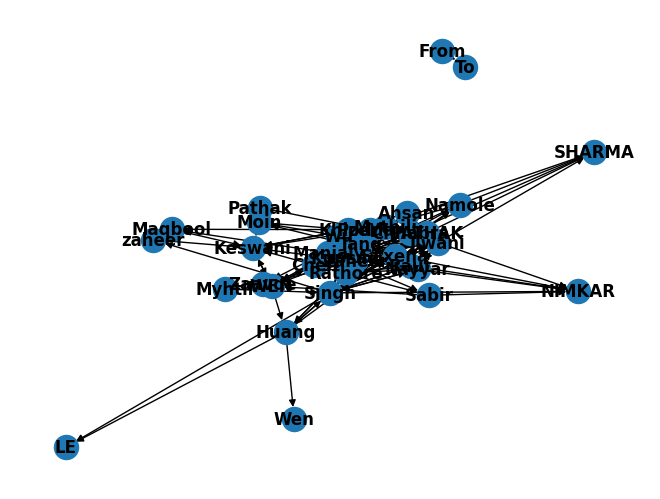

In [8]:
#-- There are many ways to visualize a network, and a force-directed layout, of which the below figure is an example, is among the most common.

nx.draw(G_emails, nx.spring_layout(G_emails, scale=2), with_labels=True, font_weight='bold') # scale=2 doubles the distance between all nodes


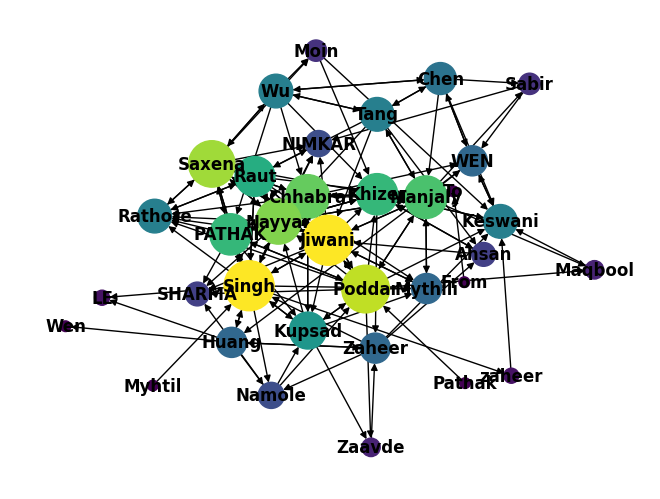

In [9]:
##-- Kamada-Kawai force-directed layout.
import numpy as np
deg_centrality = nx.degree_centrality(G_emails)
centrality = np.fromiter(deg_centrality.values(), float) # create a new one-dimensional array from the deg_centrality object

nx.draw_kamada_kawai(G_emails, with_labels=True, font_weight='bold', node_size= centrality*2e3, node_color=centrality) # node size and colour denote its degree centrality


# Computing characteristics of our network

Below are a few examples to obtain characteristics of the network. A full list of available measures can be seen here: https://networkx.org/documentation/stable/reference/algorithms/index.html

## Density

A good metric to begin with is the network density, or the ratio of actual edges to all possible edges in the network. In an directed network like this one, there could be an edge (email) between any two nodes (students), but as you saw in the visualization, only a few of those possible edges are actually present. Network density gives you a quick sense of how closely knit your network is.

In [10]:
#-- Density

nx.density(G_emails)

#-- A value of 0 would mean that there are no connections at all, and a value of 1 would indicate that all possible edges are present, or everyone has emailed everyone else (a perfectly connected network).

0.13277310924369748

## Triadic closure

Another metric you will calculate on this network concerns the concept of triadic closure. Triadic closure supposes that if two people know the same person, they are likely to know each other. The number of these enclosed triangles in the network can be used to find clusters and communities of individuals that all know each other fairly well.

One way of measuring triadic closure is called clustering coefficient because of this clustering tendency.

Another is transitivity, or the ratio of all triangles over all possible triangles. A possible triangle exists when one person knows two people. So transitivity, like density, expresses how interconnected a graph is in terms of a ratio of actual over possible connections.

In [11]:
print("This network's average clustering coefficient is %f." % nx.average_clustering(G_emails))

print('Its transitivity is %f. ' % nx.transitivity(G_emails))

This network's average clustering coefficient is 0.334147.
Its transitivity is 0.330389. 


## Reciprocity

In [12]:
#-- Algorithms to calculate reciprocity in a directed graph (in this case, two-way digital communication).

nx.reciprocity(G_emails)

0.5063291139240507

# Which nodes are most important

After getting some basic measures of the entire network, a good next step is to find which nodes are the most important ones in your network. In network analysis, measures of the importance of nodes are referred to as centrality measures.

## Measures of degree

Degree is the simplest and the most common way of finding important nodes. A node’s degree is the sum of its edges. The nodes with the highest degree in a social network are the people who know the most people. These nodes are often referred to as *hubs*.

In [13]:
#-- Degree, or how many conversations each person has had
G_emails.degree()


DiDegreeView({'From': 1, 'To': 1, 'Ahsan': 5, 'Khizer': 15, 'Jiwani': 22, 'Chen': 9, 'Sabir': 4, 'Keswani': 10, 'Manjaly': 16, 'Tang': 10, 'WEN': 8, 'Wu': 10, 'Chhabra': 17, 'PATHAK': 15, 'Kupsad': 12, 'Nayyar': 18, 'Rathore': 10, 'Saxena': 19, 'SHARMA': 5, 'Poddar': 20, 'Huang': 8, 'Wen': 1, 'LE': 2, 'Namole': 6, 'Zaheer': 8, 'Singh': 22, 'Zaavde': 3, 'Mythili': 8, 'Raut': 14, 'NIMKAR': 6, 'Moin': 4, 'Maqbool': 3, 'zaheer': 2, 'Myhtil': 1, 'Pathak': 1})

In [14]:
# Who are the top 3 communicators?
sorted(G_emails.degree, key=lambda x: x[1], reverse=True)[:3]


[('Jiwani', 22), ('Singh', 22), ('Poddar', 20)]

In [15]:
#-- In-degree, or how many emails has each person received
G_emails.in_degree()

InDegreeView({'From': 0, 'To': 1, 'Ahsan': 3, 'Khizer': 10, 'Jiwani': 10, 'Chen': 3, 'Sabir': 2, 'Keswani': 8, 'Manjaly': 8, 'Tang': 3, 'WEN': 5, 'Wu': 3, 'Chhabra': 6, 'PATHAK': 6, 'Kupsad': 6, 'Nayyar': 10, 'Rathore': 8, 'Saxena': 8, 'SHARMA': 5, 'Poddar': 7, 'Huang': 3, 'Wen': 1, 'LE': 2, 'Namole': 3, 'Zaheer': 3, 'Singh': 9, 'Zaavde': 2, 'Mythili': 6, 'Raut': 6, 'NIMKAR': 6, 'Moin': 2, 'Maqbool': 2, 'zaheer': 1, 'Myhtil': 0, 'Pathak': 0})

In [16]:
#-- Out-degree, or how many emails has each person sent
G_emails.out_degree()

OutDegreeView({'From': 1, 'To': 0, 'Ahsan': 2, 'Khizer': 5, 'Jiwani': 12, 'Chen': 6, 'Sabir': 2, 'Keswani': 2, 'Manjaly': 8, 'Tang': 7, 'WEN': 3, 'Wu': 7, 'Chhabra': 11, 'PATHAK': 9, 'Kupsad': 6, 'Nayyar': 8, 'Rathore': 2, 'Saxena': 11, 'SHARMA': 0, 'Poddar': 13, 'Huang': 5, 'Wen': 0, 'LE': 0, 'Namole': 3, 'Zaheer': 5, 'Singh': 13, 'Zaavde': 1, 'Mythili': 2, 'Raut': 8, 'NIMKAR': 0, 'Moin': 2, 'Maqbool': 1, 'zaheer': 1, 'Myhtil': 1, 'Pathak': 1})

In [17]:
avg_in_degree = 0
for x in G_emails.in_degree():
  avg_in_degree += x[1]

avg_in_degree = avg_in_degree / len(G_emails.in_degree())
print('On average, your class-mates have sent %d email(s).' % avg_in_degree)

On average, your class-mates have sent 4 email(s).


In [18]:
#-- Some communicate more frequently than average.
for x in G_emails.in_degree():
  if x[1] > avg_in_degree:
    print(x)

('Khizer', 10)
('Jiwani', 10)
('Keswani', 8)
('Manjaly', 8)
('WEN', 5)
('Chhabra', 6)
('PATHAK', 6)
('Kupsad', 6)
('Nayyar', 10)
('Rathore', 8)
('Saxena', 8)
('SHARMA', 5)
('Poddar', 7)
('Singh', 9)
('Mythili', 6)
('Raut', 6)
('NIMKAR', 6)


## Closeness centrality
Closeness centrality is calculated as the reciprocal of the sum of the length of the shortest paths between the node and all other nodes in the graph. Thus, the more central a node is, the closer it is to all other nodes.


In [ ]:
#-- Closeness centrality
nx.closeness_centrality(G_emails)


{'From': 0.0,
 'To': 0.029411764705882353,
 'Ahsan': 0.34416154521510095,
 'Khizer': 0.4611764705882353,
 'Jiwani': 0.4117647058823529,
 'Chen': 0.29188384214445273,
 'Sabir': 0.29188384214445273,
 'Keswani': 0.4434389140271493,
 'Manjaly': 0.38431372549019605,
 'Tang': 0.2956259426847662,
 'WEN': 0.38431372549019605,
 'Wu': 0.30745098039215685,
 'Chhabra': 0.3780135004821601,
 'PATHAK': 0.4045407636738906,
 'Kupsad': 0.3719165085388994,
 'Nayyar': 0.4117647058823529,
 'Rathore': 0.39082751744765704,
 'Saxena': 0.38431372549019605,
 'SHARMA': 0.374777183600713,
 'Poddar': 0.3780135004821601,
 'Huang': 0.3547511312217195,
 'Wen': 0.26314142678347935,
 'LE': 0.31711915535444946,
 'Namole': 0.32477216238608114,
 'Zaheer': 0.3547511312217195,
 'Singh': 0.4117647058823529,
 'Zaavde': 0.27781715095676823,
 'Mythili': 0.3493761140819964,
 'Raut': 0.34416154521510095,
 'NIMKAR': 0.36918349429323966,
 'Moin': 0.28823529411764703,
 'Maqbool': 0.3034055727554179,
 'zaheer': 0.28823529411764703,
 

## Betweeness centrality

Betweenness centrality, which is also expressed on a scale of 0 to 1, finds nodes that connect two otherwise disparate parts of a network. If you’re the only thing connecting two clusters, every communication between those clusters has to pass through you. In contrast to a *hub* (nodes with the highest degree), this sort of node is often referred to as a *broker*.

In [19]:
#- Betweenness centrality
nx.betweenness_centrality(G_emails)

{'From': 0.0,
 'To': 0.0,
 'Ahsan': 0.006945248255408683,
 'Khizer': 0.10616156471771443,
 'Jiwani': 0.07199619057907827,
 'Chen': 0.03665763826191634,
 'Sabir': 0.0019013666072489601,
 'Keswani': 0.07046232634467928,
 'Manjaly': 0.07281414861628766,
 'Tang': 0.015441530147412497,
 'WEN': 0.07709608177522617,
 'Wu': 0.022445038621509202,
 'Chhabra': 0.05442353249839879,
 'PATHAK': 0.04159027247262541,
 'Kupsad': 0.026448338747803987,
 'Nayyar': 0.02611195993548934,
 'Rathore': 0.0033521489403842337,
 'Saxena': 0.06670614986123008,
 'SHARMA': 0.0,
 'Poddar': 0.07705769176357409,
 'Huang': 0.06051596947318873,
 'Wen': 0.0,
 'LE': 0.0,
 'Namole': 0.018538324420677363,
 'Zaheer': 0.04533191605384119,
 'Singh': 0.15194522253345782,
 'Zaavde': 0.0034709843533372938,
 'Mythili': 0.003819709702062643,
 'Raut': 0.016796948347750487,
 'NIMKAR': 0.0,
 'Moin': 0.0012873836403248166,
 'Maqbool': 0.0005743711626064567,
 'zaheer': 0.0021043771043771043,
 'Myhtil': 0.0,
 'Pathak': 0.0}

In [20]:
#-- Potential brokers
brokerage_dict = dict(nx.betweenness_centrality(G_emails))

ordered_brokers = sorted(brokerage_dict, key=brokerage_dict.get, reverse=True)
print(ordered_brokers[:3])

['Singh', 'Khizer', 'WEN']


In [21]:
#-- Shortest path computes the shortest paths and path lengths between nodes in the graph.
#-- What's the shortest path you could reach someone you haven't talked to before?

nx.shortest_path(G_emails, source = 'Tang', target = 'Zaavde') # replace 'a' and 'b' with actual node labels/ student names

['Tang', 'Jiwani', 'Poddar', 'Zaavde']

# Time for some experimentation on a different network

## Zachary karate club

This is the well-known and much-used Zachary karate club network. The data was collected from the members of a university karate club by Wayne Zachary in 1977. Each node represents a member of the club, and each edge represents a tie between two members of the club. The network is undirected. An often discussed problem using this dataset is to find the two groups of people into which the karate club split after an argument between two teachers.

Node Degree
   0     16
   1      9
   2     10
   3      6
   4      3
   5      4
   6      4
   7      4
   8      5
   9      2
  10      3
  11      1
  12      2
  13      5
  14      2
  15      2
  16      2
  17      2
  18      2
  19      3
  20      2
  21      2
  22      2
  23      5
  24      3
  25      3
  26      2
  27      4
  28      3
  29      4
  30      4
  31      6
  32     12
  33     17


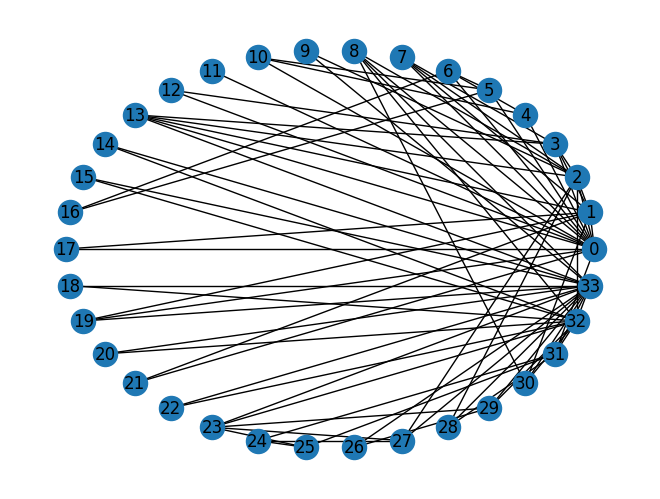

In [22]:
G_karate = nx.karate_club_graph() # Load the graph from networkx's library

print('Node Degree')
for v in G_karate:
    print(f"{v:4} {G_karate.degree(v):6}")

nx.draw_circular(G_karate, with_labels=True)

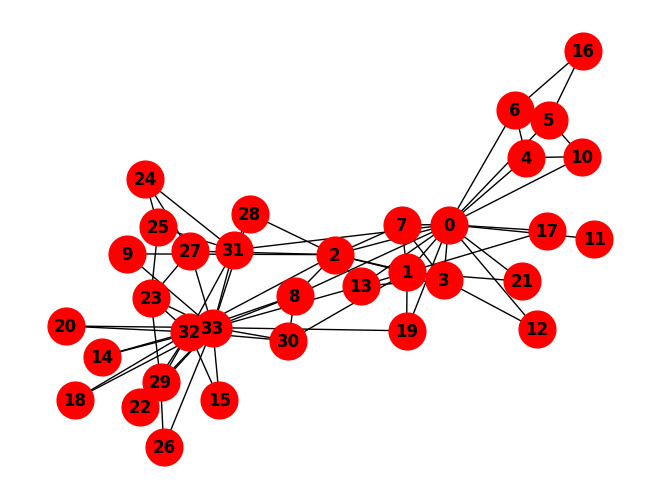

In [37]:
##-- Task 1: Use a force-directed layout to draw Zachary's network. Experiment with different node size and colours to get a sense of network dynamics.
nx.draw(G_karate, nx.spring_layout(G_karate, scale=2), with_labels=True, font_weight='bold', node_size=700, node_color='red')

In [24]:
##-- Task 2: Start computing global network characteristics

#-- How does density differ from your own class network?
print("Zachary's karate network density: ", nx.density(G_karate) )

#-- Average clustering coefficient
print('Avg. clustering coefficient: ', nx.average_clustering(G_karate) )

#-- Network transitivity
print('Network transitivity: ', nx.transitivity(G_karate) )

Zachary's karate network density:  0.13903743315508021
Avg. clustering coefficient:  0.5706384782076823
Network transitivity:  0.2556818181818182


In [36]:
##-- Which nodes are most important? Please note this network is undirected, and as such has no in out out-going edges

#-- Degree
print(G_karate.degree())

#-- Average degree
avg_degree = 0
for x in G_karate.degree():
  avg_degree += x[1]

avg_degree = avg_degree / len(G_karate.degree())
print('Average: %d .' % avg_in_degree)
#-- Some have more connections than average.

for x in G_karate.degree():
  if x[1] > avg_in_degree:
    print(x[1])

[(0, 16), (1, 9), (2, 10), (3, 6), (4, 3), (5, 4), (6, 4), (7, 4), (8, 5), (9, 2), (10, 3), (11, 1), (12, 2), (13, 5), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 3), (20, 2), (21, 2), (22, 2), (23, 5), (24, 3), (25, 3), (26, 2), (27, 4), (28, 3), (29, 4), (30, 4), (31, 6), (32, 12), (33, 17)]
Average: 4 .
16
9
10
6
5
5
5
6
12
17


In [35]:
#-- Closeness centrality. How does the centrality of this network's top 5 members differ from your own network?
closeness_centrality = nx.closeness_centrality(G_karate)
print('Closeness centrality: ', closeness_centrality)

#-- Betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G_karate)
print('Betweenness centrality: ', betweenness_centrality)

#-- Potential brokers in this network
brokerage_dict = {node: closeness_centrality[node] * betweenness_centrality[node] for node in G_karate.nodes()}
ordered_brokers = sorted(brokerage_dict.items(), key=lambda x: x[1], reverse=True)[:3]
print('Top 3 potential brokers:', ordered_brokers)

Closeness centrality:  {0: 0.5689655172413793, 1: 0.4852941176470588, 2: 0.559322033898305, 3: 0.4647887323943662, 4: 0.3793103448275862, 5: 0.38372093023255816, 6: 0.38372093023255816, 7: 0.44, 8: 0.515625, 9: 0.4342105263157895, 10: 0.3793103448275862, 11: 0.36666666666666664, 12: 0.3707865168539326, 13: 0.515625, 14: 0.3707865168539326, 15: 0.3707865168539326, 16: 0.28448275862068967, 17: 0.375, 18: 0.3707865168539326, 19: 0.5, 20: 0.3707865168539326, 21: 0.375, 22: 0.3707865168539326, 23: 0.39285714285714285, 24: 0.375, 25: 0.375, 26: 0.3626373626373626, 27: 0.4583333333333333, 28: 0.4520547945205479, 29: 0.38372093023255816, 30: 0.4583333333333333, 31: 0.5409836065573771, 32: 0.515625, 33: 0.55}
Betweenness centrality:  {0: 0.43763528138528146, 1: 0.053936688311688304, 2: 0.14365680615680618, 3: 0.011909271284271283, 4: 0.0006313131313131313, 5: 0.02998737373737374, 6: 0.029987373737373736, 7: 0.0, 8: 0.05592682780182781, 9: 0.0008477633477633478, 10: 0.0006313131313131313, 11: 0.